In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 从sklearn中直接生成聚类数据
from sklearn.datasets._samples_generator import make_blobs

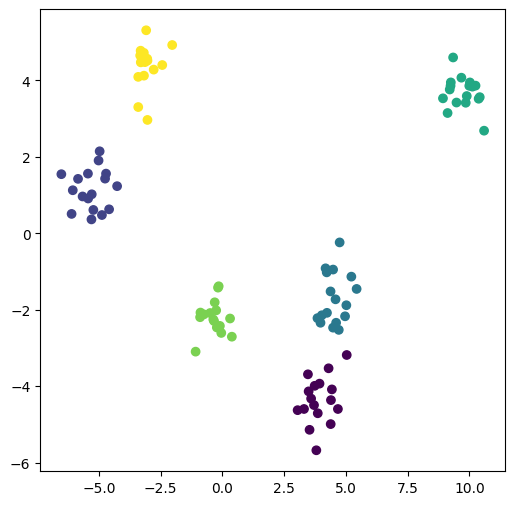

In [22]:
x, y = make_blobs(n_samples=100, centers=6, random_state=123, cluster_std=0.5)
plt.figure(figsize=(6, 6))
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

In [34]:
from numpy import ndarray
# 引入scipy中的距离函数，默认欧式距离
from scipy.spatial.distance import cdist


class KMeans:
    def __init__(self, cluster_num, max_iter=500):
        self.cluster_num = cluster_num
        self.max_iter = max_iter
        self.centroids = None

    def fit(self, data: ndarray):
        if data.shape[0] < self.cluster_num:
            raise ValueError('data size is less than cluster size')
        # Select initial centroids
        self.centroids = data[np.random.randint(0, data.shape[0], self.cluster_num), :]
        for _ in range(self.max_iter):
            distances = cdist(data, self.centroids)
            cluster_arr = np.argmin(distances, axis=1)
            for i in range(self.cluster_num):
                self.centroids[i] = np.mean(data[cluster_arr == i], axis=0)

    def predict(self, data: ndarray):
        distances = cdist(data, self.centroids)
        return np.argmin(distances, axis=1)

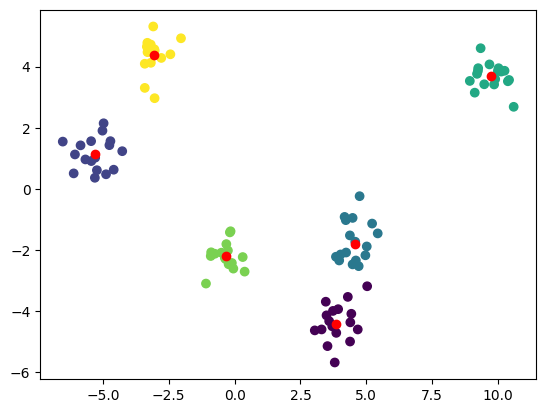

In [49]:
model = KMeans(6)
model.fit(x)
centroids = model.centroids
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r')

[3 0]


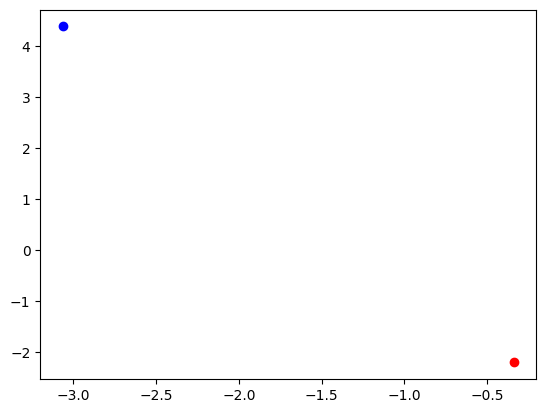

In [54]:
data = np.array([[0,0],[2,4]])
print(model.predict(data))
plt.scatter(centroids[3, 0], centroids[3, 1], c='r')
plt.scatter(centroids[0, 0], centroids[0, 1], c='b')